# Sopravviverai alla sciagura del Titanic? Un Classificatore Binario basato su Neural Network

<span style="color:red"><b>Nota: se lo desideri, puoi aprire direttamente questo Notebook in forma interattiva su Google Colab! Per fare ciò, clicca sul link qui di seguito e verrai portato automaticamente sull'Ambiente Live. Ti dovrai loggare con il tuo Account Google!</b></span>
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/r-lomba/titanic/blob/master/titanic.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

## Operazioni preliminari

Questo Jupyter Notebook ci permetterà di completare in ogni sua parte tutte le fasi richieste per partecipare alla Kaggle Competition "Titanic - Machine Learning from Disaster", descritta ampiamente nell'articolo. Il progetto si suddivide logicamente nelle seguenti Sezioni, che varranno affrontate una ad una:

- Operazioni preliminari, caricamento Librerie, Setup dell'Ambiente
- Data Preparation del Dataset di TRAINING fornito da Kaggle a corredo
- Costruzione del Modello di Rete Neurale che verrà usato per effettuare le Predizioni sul Dataset di TEST fornito da Kaggle, e privo della cosiddetta "Class Label" (ovvero dell'informazione che ci dice se il Passeggero in esame è sopravvissuto al disastro oppure no). Tali Predizioni sono l'oggetto vero e proprio della Competition
- Training del Modello utilizzando il Dataset preparato nelle fasi precedenti
- Inferenza dei risultati oggetto della Competition, usando il Modello addestrato nelle fasi precedenti
- Generazione di un file CSV in formato adatto ad essere uploadato e valutato sul sito della Competition
- Valutazione della propria prestazione in classifica generale!

### Importiamo le librerie necessarie e inizializziamo la visualizzazione dei grafici

In [1]:
# Importiamo le librerie di base, calcolo e per la visualizzazione
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importiamo dal framework per il Deep Learning "Keras", in questo caso
# basato su backend Tensorflow, un Modello base di Deep Neural Network
# e della tipologia di Layer di neuroni che intendiamo usare per costruirla.
# In questo caso, useremo dei Layer di tipo "Dense" e dei neuroni
# di tipo "ReLU" per i Deep Layers e "Sigmoid" per il neurone di output
# che ci fornirà la previsione finale relativamente ai passeggeri
# di cui ci verrà chiesto di stimare la sopravvivenza
from keras.models import Sequential
from keras.layers import Dense

# Importiamo dalla Libreria per il Machine Learning "Scikit Learn"
# la funzione "Standard Scaler" che ci permette di normalizzare Colonne
# Scalari in un Dataframe, riducendone i valori contenuti ad un range
# che va da -1 a +1 in maniera ragionata. Maggiori dettagli sull'utilizzo
# di questa liberia saranno riportati in seguito, al momento di applicarla.
# Importiamo inoltre il modulo "train_test_split" che ci permetterà di
# controllare la progressione e la bontà dell'apprendimento in corso. Anche
# in questo caso, più dettagli saranno dati al momento opportuno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Abilitiamo la visualizzazione direttamente sul nostro Notebook, per
# poter plottare a video i Grafici di interesse
%matplotlib inline

# Impostiamo un Seed per la randomizzazione, in modo da poter ottenere
# risultati coerenti ogni volta che lanciamo il nostro Notebook.
# Se non si imposta un Seed, ogni volta che eseguiremo il nostro esercizio
# otterremo risultati diversi, dovuti alla natura probabilistica degli
# algoritmi utilizzati
np.random.seed(1)

Using TensorFlow backend.


<hr>

## Fase di Data Preparation

In qualsiasi progetto di Machine Learning oppure Deep Learning, sicuramente la fase di Data Preparation è di cruciale importanza.

Spesso è la fase di Progetto che richiede più tempo per essere portata a termine, perchè comporta una vera comprensione delle informazioni contenute nel Dataset da parte dell'Analista.

Inoltre, prevede un'accurata trasformazione dei Campi disponibili in formati e con modalità che favoriscano l'apprendimento della Rete Neurale o comunque del Modello del quale si sta facendo il training.

Il Modello deve poter rilevare nel modo più proficuo possibile le informazioni (ovvero le cosiddette "Features") che noi gli passiamo, per poterne catturare i pattern più significativi ed essere successivamente in grado di effettuare previsioni su dati mai visti prima.

### Leggiamo in un Dataframe (struttura logica implementata dalla libreria Pandas che ci consente di manipolare interi Dataset molto facilmente) il file "train.csv" scaricato da Kaggle

Il sito Kaggle ci mette inizialmente a disposizione un file CSV perfetto per essere utilizzato per il Training della nostra Rete Neurale. Esso contiene sia le Features descrittive di un gran numero di Passeggeri, che un Flag che ci indica se tale Passeggero è sopravvissuto al disastro o meno.

Carichiamo quindi il file nel Dataframe di riferimento:

In [2]:
# Il file di riferimento "train.csv" scaricato dal sito della
# Kaggle Competition dovrà essere salvato nella stessa directory di questo
# Jupyter Notebook, se stai lavorando in locale. Se invece stai lavorando
# sull'Istanza Google Colab come suggerito nell'articolo, non devi fare nulla
# in quanto il file stesso è già stato scaricato ed è già presente nella
# posizione corretta
train = pd.read_csv('https://raw.githubusercontent.com/r-lomba/titanic/main/train.csv')

### Visualizziamo alcune righe del nostro Dataframe di Train, per renderci conto delle Colonne che lo compongono

E' sempre importante rendersi conto visivamente dell'aspetto e del "carattere" dei Dati che stiamo trattando. Per questo è senz'altro comodo fare una prima estrazione, a titolo di esempio, di alcuni dei Record presenti nel nostro Dataframe:

In [3]:
# Eseguendo l'estrazione dal Dataframe di Train, si potrà notare che molti record
# contengono campi valorizzati a "NULL" (dove si vede indicato "NaN" ovvero "Not a
# Number"). Quando si fa il Training di un Modello usando un Dataset, non è mai buona
# cosa avere dei dati mancanti, perchè stiamo dando delle informazioni poco precise
# e quando ci troveremo ad usare il nostro Modello per fare previsioni su Dati
# mai visti prima, la capacità di generalizzare e la conseguente precisione dei
# risultati ne risentiranno.
# Vedremo nel proseguo che nel corso della nostra fase di Data Preparation ci
# prenderemo cura di sostituire questi dati mancanti con valori opportuni oppure,
# laddove questo non fosse possibile, elimineremo i relativi record. Questo ci
# consentirà un migliore training del nostro Modello
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Visualizziamo la Distribuzione per Età dei passeggeri in ognuna delle tre Classi di Viaggio della nave

Come abbiamo potuto notare poc'anzi visualizzando il nostro Dataframe di Test, che dobbiamo usare per l'apprendimento del nostro Mofdello, una delle informazioni fondamentali, ovvero l'Età del Passeggero, in parecchi casi risulta essere assente.

Questo è senz'altro un problema a cui dobbiamo porre rimedio. Dobbiamo integrare quest'informazione mancante in maniera ragionata. Per poterlo fare cominciamo quindi con lo stimare qual e' la Distribuzione per Eta' dei Passeggeri nelle tre Classi della nave usando le informazioni che invece sono presenti.

Visualizzeremo questa informazione tramite un "Box Chart", molto adatto a fornire un colpo d'occhio immediato per questo tipo di informazioni

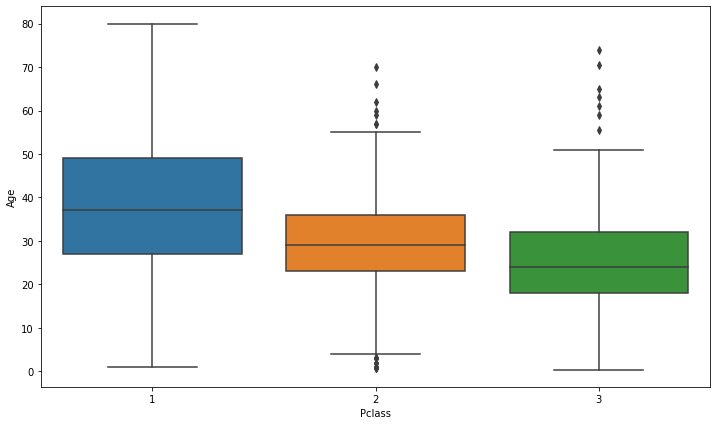

In [4]:
# Visualizziamo la Distribuzione per Eta' dei Passeggeri nelle tre Classi della nave
# tramite un "Box Chart", molto adatto a fornire un colpo d'occhio immediato per
# questo tipo di informazioni
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

### Dalla visualizzazione precedente possiamo intuire qual è l'età media dei Passeggeri in ogni Classe di Viaggio della nave

Possiamo quindi scrivere una funzione che ci permetta, laddove il dato dell'età sia mancante nel nostro Dataset, di integrarlo in maniera ragionata:

In [5]:
# Questa funzione riceve in input una Tupla "Età" + "Classe di Viaggio"
# e, laddove il campo "Età" non risulti essere valorizzato, restituisce
# un valore di default stimato in base alle nostre analisi sull'età media che sono
# state spiegate poc'anzi in questo stesso Jupyter Notebook
def assegna_eta(tupla_valori):
    Age = tupla_valori[0]
    Pclass = tupla_valori[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

### Applichiamo la funzione appena scritta al nostro Dataset

Assegnamo quindi un'Età di default ai Passeggeri privi di tale informazione:

In [6]:
# Modifica in-place il nostro Dataframe di riferimento, applicando
# la funzione che integra l'Età del Passeggero laddove mancante
train['Age'] = train[['Age','Pclass']].apply(assegna_eta,axis=1)

### Il campo "Età" è stato sistemato, ma ci accorgiamo che anche nel campo "Cabina" abbiamo un grande numero di valori "NULL"

In questo caso, stimare un valore di default è impresa praticamente impossibile, e comunque non appare di fondamentale importanza categorizzare la "Cabina" del Passeggero in esame ai fini di far apprendere il nostro Algoritmo.

Si decide quindi di eliminare completamente la Colonna dal Dataset, così come eliminiamo anche altre due Colonne contenenti informazioni non strutturate e di dubbia utilità per il Training, ovvero "Ticket" (il numero di serie del biglietto) e ovviamente "PassengerId", in quando l'ID del Passeggero non è utile in questa fase (non aggiunge informazioni utili a caratterizzare un Passeggero):

In [7]:
# Drop delle Colonne non utilizzabili o non interessanti
train.drop('Cabin',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)

### A questo punto tutti i Campi con valore "NULL" dovrebbero essere stati trattati, in un modo o nell'altro

Per accertarci che non restino ulteriori Record spuri, eseguiamo la seguente riga di codice che elimina dal Dataframe qualsiasi ulteriore riga contenete "NULL" che dovesse essere rimasta:

In [8]:
# Drop di qualsiasi Colonna sia rimasta con valori "NULL"
train.dropna(inplace=True)

### Possiamo a questo punto ispezionare visivamente un campione del Dataframe di Train, per capire come sia stato trasformato nel corso delle operazioni effettuate

Usando la stessa tecnica vista poc'anzi, visualizziamo alcuni Dati del Dataframe finora elavorato:

In [9]:
# Ispezioniamo visivamente il Dataframe risultante
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Processiamo ora il campo "Name", per trasformarlo in un campo Categorical, quindi molto utile da dare in pasto al nosto Modello ai fini del Training

Il Campo "Name" contiene informazioni quali:

- Il Titolo (es. "Mr" oppure "Mrs" o ancora "Ms", spesso indicante il fatto se il Passeggero è sposato oppure no
- Se è ad esempio un Ufficiale, o se ha incarichi sociali particolari
- Se ha Titoli Nobiliari

Tutto questo ci fornisce informazioni più dettagliate che meglio descrivono la Categoria di un Passeggero, andando olte il campo "Sex", che resta comunque semanticamente importantissimo.

Possiamo quindi scrivere una funzione per estrarre il Titolo del Passeggero dal campo "Name"

In [10]:
# Funzione che splitta la Stringa "Name" ed estrae il Titolo
# sociale del Passeggero in esame
def ottieni_titolo(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

Visualizziamo ora la lista dei Titoli sociali estratti:

In [11]:
# Visualizziamo la lista dei Titoli sociali dei Passeggeri che sono
# stati rilevati dalla nostra funzione di estrazione
titoli = sorted(set([x for x in train.Name.map(lambda x: ottieni_titolo(x))]))
print('Titoli sociali trovati nel dataset:')
print(len(titoli), ':', titoli)
print()

Titoli sociali trovati nel dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



Come spiegato prima, siamo ora in grado di convertire il campo "Name" (un campo non strutturato e che non offre informazioni utili all'apprendimento del Modello) in un campo di tipo "Categorical", strutturato e ad alto valore informativo

In [12]:
# Creiamo una Categorizzazione dei Titoli sociali, ritornando
# per ogni Passeggero in esame se di tratta di
# "Mr", "Master", Mrs", "Miss", "Ufficiale", "Nobile"
def codifica_titolo(record_completo):
    titolo = record_completo['Title']
    if titolo in ['Capt', 'Col', 'Major', 'Rev']:
        return 'Ufficiale'
    elif titolo in ['the Countess', 'Mme', 'Lady', 'Don', 'Dona', 'Jonkheer', 'Sir']:
        return 'Nobile'
    elif titolo in ['Mlle', 'Ms']:
        return 'Miss'
    elif titolo =='Dr':
        if record_completo['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return titolo

### A questo punto possiamo applicare la funzione di Categorizzazione del Titolo sociale al nostro Dataframe di Train

Potremo così creare una nuova Colonna "Title". Inoltre, possiamo successivamente eliminare la Colonna "Name", che come abbiamo visto non contiene di per sè informazioni strutturate utili al Training del Modello:

In [13]:
# Decodifichiamo la Colonna "Name" ed estraiamo il
# Titolo sociale del Passeggero in esame
train['Title'] = train['Name'].map(lambda x: ottieni_titolo(x))

# Infine, rimpiazziamo il Titolo appena estratto con una sua
# codifica Categorica ancora più strutturata
train['Title'] = train.apply(codifica_titolo, axis=1)

# Ora la colonna "Name", non strutturata, non ci serve
# più ai fini dell'Apprendimento del nostro Modello, e
# quindi la eliminamo dal Dataframe
train.drop('Name', axis=1, inplace=True)

In [14]:
# Ispezioniamo visivamente il Dataframe risultante
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## Convertiamo le Variabili Categoriche in valori numerici "One-Hot Encoded"

Allo scopo di preparare il Dato per essere dato in pasto a un Modello per eseguirne il Training, è pratica comune nel Machine Learning effettuare quello che viene definito "One-Hot Encoding" delle Variabili Categoriche.

Questo significa che se abbiamo una Colonna Categorica nel nostro Dataframe, ad esempio "Title", è necessario splittarla in un numero di colonne pari al numero di Categorie che la colonna originale può assumere.

Ognuna delle nuove Colonne "Dummy" potrà avere valore "0" oppure "1" a seconda che il Passeggero in esame rientri in quella Categoria oppure no.

Per fare un esempio pratico, le possibili Categorie che troviamo nella colonna "Title" sono le seguenti: "Mr", "Miss", "Master", "Mrs", "Nobile", "Ufficiale".

In questo caso specifico, il nostro obiettivo è, partendo dalla Colonna "Title", ottenere invece 6 colonne derivate, quelle elencate poc'anzi. Ognuna di tali Colonne assumerà valore "0" oppure "1" a seconda che in effetti il Passeggero in esame ricada in quella Categoria!

Notermo in effetti che l'Encoding eseguito usando la Libreria Pandas creerà solo 5 colonne. Il motivo è che creare 6 colonne in effetti è inutile. 5 Colonne che valgano tutte "0" infatti indicano implicitamente che quel Passeggero appartiene alla sesta Categoria non elencata esplicitamente

### Effettuiamo il "One-Hot Encoding" delle Variabili Categorche in modo tale che la Rete Neurale possa interpretarle correttamente

Eseguiamo ora operativamente quanto spiegato su tutte le colonne Categoriche nel nostro Dataframe, ovvero il "Sesso", il "Porto di Imbarco", il "Titolo sociale" e la "Classe di Viaggio" dei nostri Passeggeri.

Avremo inoltre cura di droppare le Colonne "originali" che non sono "One-Hot Encoded".

Infine, aggiorneremo la definizione del nostro Dataframe unendo alla sua destra le nuove Colonne "One-Hot Encoded" appena estratte:

In [15]:
# Estraiamo le colonne "One-Hot Encoded" a partire dalle
# Colonne Categoriche
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)
travelclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [16]:
# Eliminiamo le Colonne originali e uniamo al loro posto le
# Colonne "One-Hot Encoded" appena create
train.drop(['Sex', 'Embarked', 'Title', 'Pclass'],axis=1,inplace=True)
train = pd.concat([train, sex, embark, title, travelclass],axis=1)

In [17]:
# Ispezioniamo visivamente il Dataframe risultante
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Nobile,Ufficiale,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,0,1


### Ridefiniamo le Colonne "Age" and "Fare" applicando la funzione Standard Scaler della Libreria SkLearn

Quando in un Dataset sono presenti Colonne che contengano valori scalari discreti che però assumano valori molto eterogenei tra loro in termini di scala (nel nostro caso, le Colonne "Age" e "Fare" ovvero il prezzo pagato per il biglietto), è pratica comune nel Machine Learning rendere omogenee queste grandezze, in modo da aiutare la Rete Neurale che su di esse deve apprendere a convergere più rapidamente e in maniera più consistente.

E' pratica comune normalizzare tutti questi valori scalari in un range che vada da -1 a +1. Nei passaggi successivi implementeremo questo accorgimento che ci permetterà di ottenere migliori risultati in termini di precisione previsionale da parte del nostro Modello.

In [18]:
# Standard Scaling della Colonna "Age"
eta = train['Age'].values.reshape(train.shape[0],1)
normalizzatore = StandardScaler()
normalizzatore.fit(eta)
eta_normalizzata = normalizzatore.transform(eta)
train['Age'] = eta_normalizzata

# Standard Scaling della Colonna "Fare"
tariffa = train['Fare'].values.reshape(train.shape[0],1)
normalizzatore = StandardScaler()
normalizzatore.fit(tariffa)
tariffa_normalizzata = normalizzatore.transform(tariffa)
train['Fare'] = tariffa_normalizzata

In [19]:
# Ispezioniamo visivamente il Dataframe risultante
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Nobile,Ufficiale,2,3
0,0,-0.531670,1,0,-0.500240,1,0,1,0,1,0,0,0,0,1
1,1,0.680232,1,0,0.788947,0,0,0,0,0,1,0,0,0,0
2,1,-0.228695,0,0,-0.486650,0,0,1,1,0,0,0,0,0,1
3,1,0.453001,1,0,0.422861,0,0,1,0,0,1,0,0,0,0
4,0,0.453001,0,0,-0.484133,1,0,1,0,1,0,0,0,0,1


### Il Dataframe di Apprendimento è finalmente pronto in ogni sua parte e la fase di Data Preparation è conclusa! Ora possiamo dare in pasto il nostro Dataframe alla Rete Neurale per effettuarne il Training!

<hr>

# Creiamo e applichiamo la Rete Neurale

Innanzitutto, splittiamo il nostro Dataframe di apprendimento preparato con fatica in due sezioni, rispettivamente composte dall'80% e dal 20% dei Record originali.

Questo perchè è pratica comune nel Machine Learning tenersi da parte un subset dei Record di cui comunque conosciamo la Class Label (ovvero, nel nostro caso, il flag "Survived" che ci dice se il Passeggero è sopravvissuto oppure no.

Man mano che il Training procede, potremo utilizzare il nostro Subset di Validazione (costituito quindi da dati che avremo artificiosamente nascosto alla Rete Neurale che sta apprendendo) e simulare una Previsione della Class Label.

Potremo a questo punto confrontare la Predizione inferita dalla Rete Neurale con il valore "vero", e capire se la Previsione è stata corretta oppure no. Ripetendo questa operazione su tutto il Dataframe di Validazione, potremo stimare la "Validation Accuracy" del nostro Modello.

Man mano che il Training procede, ci potremo aspettare senz'altro un incremento sulla Accuracy di Training, perchè sono dati dei quali la Rete Neurale conosce e "utilizza" la Class Label per migliorarsi. Ma dovremo anche verificare che di pari passo otteniamo un miglioramento anche sulle Previsioni inferite dal Set di Validazione, ovvero su dati che la Rete "non conosce". Questo non è scontato, ma è il vero segnale che il nostro Modello sta imparando a "generalizzare", e sarà quindi usabile con successo nel mondo reale.

Nel nostro caso, per prevedere correttamente i risultati utili per piazzarsi bene nella Competition!

### Prepariamo il Set di Training e il Set di Validazione

Prepariamo un Dataframe che contiene le sole Class Label a noi note, "y", e un Dataframe che contiene il resto dei Campi.

Usando la funzione "train_test_split" della Libreria Scikit Learn, spezziamo infine questi Set in Subset di "Train" vero e proprio e in Set di "Validazione", in proporzione di 80% - 20%

In [20]:
# Estraiamo le Class Label dal Dataframe totale (Colonna "Survived")
# in un nuovo Dataframe contenente, quindi, i soli risultati corretti
y = train['Survived']

# Eliminiamo la colonna con la Class Label dal Dataframe originale
X = train.drop('Survived', axis=1)
 
# Splittiamo i Set appena ottenuti in "Training" e "Validation"
# in proporzione 80% - 20%
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2)

In [21]:
# Visualizziamo le Dimensioni effettive dei nosti Set di dati:
print("Dimensione Set di Train: " + str(X_tr.shape))
print("Dimensione Set di Validazione: " + str(X_va.shape))
print("Dimensione Set Class Labels di Train: " + str(y_tr.shape))
print("Dimensione Set Class Labels di Validazione: " + str(y_va.shape))

Dimensione Set di Train: (711, 14)
Dimensione Set di Validazione: (178, 14)
Dimensione Set Class Labels di Train: (711,)
Dimensione Set Class Labels di Validazione: (178,)


In [22]:
# Visualizziamo un estratto del Set di Training
X_tr.head()

,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Nobile,Ufficiale,2,3
121,-0.380182,0,0,-0.484133,1,0,1,0,1,0,0,0,0,1
687,-0.758902,0,0,-0.441435,1,0,1,0,1,0,0,0,0,1
790,-0.380182,0,0,-0.490173,1,1,0,0,1,0,0,0,0,1
837,-0.380182,0,0,-0.484133,1,0,1,0,1,0,0,0,0,1
659,2.195110,0,2,1.634368,1,0,0,0,1,0,0,0,0,0


In [23]:
# Visualizziamo un estratto del Set di Class Labels di Training
y_tr

121    0
687    0
790    0
837    0
659    0
      ..
716    1
768    0
73     0
236    0
37     0
Name: Survived, Length: 711, dtype: int64

### Assegnamo al primo Layer di Input della Rete Neurale un numero di neuroni pari al numero di Features presenti nel nostro Dataset di Training, in questo caso 14.

### In questo modo, ognuno dei Campi componenti il nostro Dataframe va a costituire un segnale di Input per lo strato di ingresso della Rete Neurale stessa. Quindi, il numero di Neuroni del primo Layer non può essere modificato.
 
### Sentiti invece libero di giocare con il numero e la tipologia dei Neuroni negli strati intermedi.

### Il Neurone di Output, infine, deve rimanere unico perchè stiamo costruendo un Classificatore Binario, e tale Neurone sarà quello da cui andremo a leggere le nostre Previsioni, per stimare se ci stiamo avvicinando più a uno "0" oppure a un "1"

La nostra Rete Neurale avrà quindi le seguenti caratteristiche:

- Dimensione dell'Input Layer uguale al numero delle Fatures presenti nel nostro Set di Training, in questo caso 14
- Quattro Deep Layer di tipo "Dense" (ovvero dove ognuno dei Neuroni è connesso con tutti i Neuroni del Layer successivo)
- Un Neurone di Output che si andrà a leggere e che ci fornirà a tutti gli effetti la Previsione se il Passeggero sottoposto in Input sopravviverà o meno
- I Layer Deep saranno composti da Neuroni con Funzione di Attivazione di tipo "ReLU"
- Il Layer di Output sarà composto da un Neurone con Funzione di Attivazione di tipo "Sigmoid"
- I Layer Deep saranno composti rispettivamente da 20, 15, 10 e 10 Neuroni

Non è scopo del presente esercizio approfindire il significato e i casi di utilizzo delle Funzioni di Attivazione dei singoli Neuroni. Per questo, si rimanda ad un prossimo articolo!

In [24]:
# Definiamo la Rete Neurale che andremo ad addestrare
model = Sequential()
model.add(Dense(20, input_dim=14, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Visualizziamo ora lo Schema effettivo della Rete Neurale che abbiamo costruito

Per meglio comprendere cosa stiamo facendo, visualizziamo a tutti gli effetti lo Schema Logico della Rete Neurale. Questo il Summary schematico del Modello:

In [25]:
# Visualizziamo il Summary del Modello
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


### Compiliamo il nostro Modello di Rete Neurale, usando una Loss Function di tipo "Binary Crossentropy"

Prima di avviare l'apprendimento, dobbiamo compilare il nostro Modello. In questo caso, visto che ciò che dobbiamo prevedere in Output è fondamentalmente una Classe binaria "1" oppure "0", usiamo una Loss Funcrion di tipo "Binary Crossentropy", perfetta per l'uso in questa casistica.

Usermemo un Ottimizzatore di tipo "Adam".

Non è scopo di questo esercizio approfondire le tipologie di Loss Fuction e le loro possibili applicazioni, e neppure le tipologie di Ottimizzatore disponibili o il loro funzionamento.

Per questi argomenti si rimanda a un prossimo articolo!

In [26]:
# Compiliamo il Modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Finalmente, avviamo l'Apprendimento!

Siamo giunti al momento cruciale, ovvero il Training del nostro Modello.

Quello che stiamo per dire alla nostra Rete Neurale di eseguire è di:

- Leggere il Set di Train e apprendere su di esso
- Leggerlo in chunk composti da 10 Record
- Per verificare le Performance delle Previsioni su Dati non visti, usare il Set di Validazione
- Ripetere il tutto per 14 volte (Epochs)
- Salvare la progressione di Apprendimento in un oggetto "history" in modo che poi potremo plottarne un Grafico

Partiamo! Eseguiamo quindi la cella successiva e attendiamo il completamento delle 14 Epochs:

In [27]:
# Eseguiamo il fitting del nostro Modello sul Set di Training e di Validazione
history = model.fit(X_tr, y_tr, validation_data=(X_va, y_va), epochs=14, batch_size=10)

Train on 711 samples, validate on 178 samples
Epoch 1/14
711/711 [==============================] - 0s 493us/step - loss: 0.6709 - accuracy: 0.5963 - val_loss: 0.6352 - val_accuracy: 0.5899
Epoch 2/14
711/711 [==============================] - 0s 130us/step - loss: 0.5912 - accuracy: 0.6245 - val_loss: 0.5651 - val_accuracy: 0.5955
Epoch 3/14
711/711 [==============================] - 0s 117us/step - loss: 0.5435 - accuracy: 0.6428 - val_loss: 0.5380 - val_accuracy: 0.6685
Epoch 4/14
711/711 [==============================] - 0s 115us/step - loss: 0.5127 - accuracy: 0.7876 - val_loss: 0.4958 - val_accuracy: 0.8146
Epoch 5/14
711/711 [==============================] - 0s 115us/step - loss: 0.4691 - accuracy: 0.8031 - val_loss: 0.4382 - val_accuracy: 0.8371
Epoch 6/14
711/711 [==============================] - 0s 114us/step - loss: 0.4413 - accuracy: 0.8200 - val_loss: 0.4092 - val_accuracy: 0.8315
Epoch 7/14
711/711 [==============================] - 0s 114us/step - loss: 0.4235 - accur

### Plottiamo la Accuracy e la Loss Function con il progredire delle Epochs di Apprendimento

Per renderci conto di quanto "bene" oppure "male" stiamo facendo, iniziamo col plottare un Grafico relativo alla Accuracy (Precisione) del nostro Modello, nel corso delle 14 Epochs di Training.

In particolare plottiamo l'Accuracy sia con riferimento ai dati di Training stessi, che con riferimento ai dati di Validazione (che come è facile intuire, sono il vero "banco di prova" del Modello, visto che sono dati che non vengono usati per il Training ma sono dati "mai vosti prima" dalla Rete Neurale).

Come si può immaginare, in generale un'alta Accuracy è "una buona cosa". Ma solo se abbiamo che entrambi i valori di Test e di Validation vanno più o meno di pari passo!

Infatti, un'alta Precisione sul Dataset di Train ma una contemporanea bassa Precisione sui Dati di Validazione indicherebbero che stiamo incorrendo nel fenomeno cosiddetto di "Overfitting", ovvero il nostro Modello starà rappresentando talmente bene i Dati di Training che non sarà in grado di generalizzare su dati mai visti prima, sbagliando quindi le sue Previsioni quando effettuate su Dati provenienti dal "mondo reale":

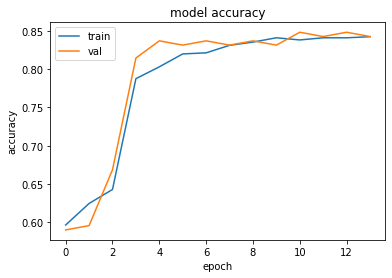

In [28]:
# Plottiamo l'Accuracy sul Set di Train e sul Set di Validazione
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Plottiamo ora l'andamento della Loss Function, con riferimento sia al Set di Train che a quello di Validazione, della Loss Function, ovvero della quantificazione di quanto "il Modello si è sbagliato" nelle sue Previsioni, siano esse state effettuate sul Set di Train o su quello di Validazione.

Come si può intuire, un basso valore della Loss Function implica che "stiamo facendo bene".

Anche in questo caso, è auspicabile che l'andamento del valore della Loss Fuction continui a calare sia per quanto riguarda il Dataset di Train che quello di Validazione. Di solito, in caso di "Overfitting" del Modello, quello a cui si assiste è invece che il valore della Loss Function di Train continua a calare, mentre dopo un certo numero di Epoch il valore della Loss Function di Validazione "riprende quota":

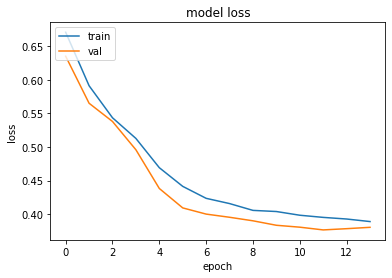

In [29]:
# Plottiamo la Loss Function sul Set di Train e sul Set di Validazione
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### L'Accuracy sembra veramente buona sia sul Set di Train che su quello di Validazione! E anche la Loss Function appare convergere molto bene!

I grafici di cui sopra appaiono molto confortanti. Vediamo ora di dare un valore numerico preciso alle Performance che abbiamo raggiunto:

In [30]:
# Eseguiamo un ciclo di Predizioni (senza ulteriore apprendimento!) sui
# dati di Training per stimare la Precisione raggiunta in termini numerici
tr_tot_loss, tr_tot_accuracy = model.evaluate(X_tr, y_tr)
print('Loss stimata del Modello sui propri Dati di Training: %.2f' % (tr_tot_loss))
print('Precisione stimata del Modello sui propri Dati di Training: %.2f' % (tr_tot_accuracy))

711/711 [==============================] - 0s 15us/step
Loss stimata del Modello sui propri Dati di Training: 0.38
Precisione stimata del Modello sui propri Dati di Training: 0.85


In [31]:
# Eseguiamo un ciclo di Predizioni (senza ulteriore apprendimento!) sui
# dati di Validazione per stimare la Precisione raggiunta in termini numerici
va_tot_loss, va_tot_accuracy = model.evaluate(X_va, y_va)
print('Loss stimata del Modello sui propri Dati di Validazione: %.2f' % (va_tot_loss))
print('Precisione stimata del Modello sui propri Dati di Validazione: %.2f' % (va_tot_accuracy))

178/178 [==============================] - 0s 25us/step
Loss stimata del Modello sui propri Dati di Validazione: 0.38
Precisione stimata del Modello sui propri Dati di Validazione: 0.84


### Le Performance appaiono veramente buone sia sul Set di Training che su quello di Validazione.

### Siamo pronti ora per la fase finale: DARE IN PASTO ALLA RETE NEURALE I DATI DELLA COMPETITION, FORNITI DA KAGGLE, E DEI QUALI NON CONOSCIAMO ASSOLUTAMENTE IL VALORE DEL FLAG "SURVIVED"! 

### Verremo quindi valutati sui nostri risultati effettivi dopo aver fatto l'Upload delle nostre Previsioni, in formato CSV, sul sito di Kaggle

<hr>

## Creiamo la Submission per Kaggle

Applicheremo ora il nostro Modello ai dati di Test inizialmente scaricati dal sito della Competition, ovvero utilizzando il file "test.csv", che è in tutto e per tutto uguale al file "train.csv" che abbiamo usato per l'Apprendimento, con l'unica differenza che non contiene il Campo dei risultati, ovvero il Campo "Survived"

### Leggiamo i Dati di Test in un Dataframe

Sulla falsariga di quanto già fatto in precedenza per i dati di "Train", leggiamo ora i dati di "Test": 

In [32]:
# Il file di riferimento "test.csv" scaricato dal sito della
# Kaggle Competition dovrà essere salvato nella stessa directory di questo
# Jupyter Notebook, se stai lavorando in locale. Se invece stai lavorando
# sull'Istanza Google Colab come suggerito nell'articolo, non devi fare nulla
# in quanto il file stesso è già stato scaricato ed è già presente nella
# posizione corretta
test = pd.read_csv('https://raw.githubusercontent.com/r-lomba/titanic/main/test.csv')

# C'è un "NULL" nella Colonna "Fare" al Record 152, sistemiamola
test.loc[152,'Fare'] = 7

# Salviamo anche una copia fisica di Riferimento del Dataframe, che ci verrà
# utile più tardi quando dovremo recuperare la Colonna "PassengerId"
test_riferimento = test.copy(deep=True)

In [33]:
# Ispezioniamo visivamente il Dataframe di Test appena caricato
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Preprocessiamo i Dati, esattamente come fatto nella fase di Data Preparation, per essere pronti a darli in pasto al nostro Modello per inferire le Previsioni da sottoporre a Kaggle

Ora che abbiamo i Dati oggetto della Competition, dobbiamo preprocessarli per poter effettuare le Previsioni. Fortunatamente, ora sappiamo già tutti gli step necessari da seguire e li possiamo eseguire in una sola volta, tutti, in un'unica casella di Codice:

In [34]:
# Modifica in-place il nostro Dataframe di riferimento, applicando
# la funzione che integra l'Età del Passeggero laddove mancante
test['Age'] = test[['Age','Pclass']].apply(assegna_eta,axis=1)

# Drop delle Colonne non utilizzabili o non interessanti
test.drop('Cabin',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

# Decodifichiamo la Colonna "Name" ed estraiamo il
# Titolo sociale del Passeggero in esame
test['Title'] = test['Name'].map(lambda x: ottieni_titolo(x))

# Infine, rimpiazziamo il Titolo appena estratto con una sua
# codifica Categorica ancora più strutturata
test['Title'] = test.apply(codifica_titolo, axis=1)

# Ora la colonna "Name", non strutturata, non ci serve
# più ai fini dell'Apprendimento del nostro Modello, e
# quindi la eliminamo dal Dataframe
test.drop('Name', axis=1, inplace=True)

# Estraiamo le colonne "One-Hot Encoded" a partire dalle
# Colonne Categoriche
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
title = pd.get_dummies(test['Title'],drop_first=True)
travelclass = pd.get_dummies(test['Pclass'],drop_first=True)

# Eliminiamo le Colonne originali e uniamo al loro posto le
# Colonne "One-Hot Encoded" appena create
test.drop(['Sex', 'Embarked', 'Title', 'Pclass'],axis=1,inplace=True)
test = pd.concat([test, sex, embark, title, travelclass],axis=1)

# Standard Scaling della Colonna "Age"
eta = test['Age'].values.reshape(test.shape[0],1)
normalizzatore = StandardScaler()
normalizzatore.fit(eta)
eta_normalizzata = normalizzatore.transform(eta)
test['Age'] = eta_normalizzata

# Standard Scaling della Colonna "Fare"
tariffa = test['Fare'].values.reshape(test.shape[0],1)
normalizzatore = StandardScaler()
normalizzatore.fit(tariffa)
tariffa_normalizzata = normalizzatore.transform(tariffa)
test['Fare'] = tariffa_normalizzata

In [35]:
# Ispezioniamo visivamente il Dataframe risultante
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Nobile,Ufficiale,2,3
0,0.401768,0,0,-0.497023,1,1,0,0,1,0,0,0,0,1
1,1.371615,1,0,-0.511885,0,0,1,0,0,1,0,0,0,1
2,2.535433,0,0,-0.463715,1,1,0,0,1,0,0,0,1,0
3,-0.180141,0,0,-0.482087,1,0,1,0,1,0,0,0,0,1
4,-0.568080,1,1,-0.417112,0,0,1,0,0,1,0,0,0,1


### Applichiamo il nosto Modello (già Addestrato!) di Rete Neurale, ed effettuiamo le nostre Previsioni sui Passeggeri oggetto del Contest

In [36]:
# Creiamo il Set di Test a partire dal Dataframe preprocessato poc'anzi
X_te = test

In [37]:
# Visualizziamo le dimentsioni del Set di Test
X_te.shape

(418, 14)

### Facciamo ora inferenza della Probabilità di Sopravvivenza di ognuno dei Passeggeri elencati nel Set di Test, utilizzando la Forward Propagation attraverso il nostro Modello di Rete Neurale

In [38]:
# Facciamo le Previsioni!
probabilita_di_sopravvivenza = model.predict(X_te)

In [39]:
# Visualizziamo un estratto dell'Array risultante, contenente le Probabilità di
# Sopravvivenza di ciascuno dei Passeggeri nel Set di Test
probabilita_di_sopravvivenza[1:10]

array([[0.56620437],
       [0.06457826],
       [0.11400196],
       [0.6285558 ],
       [0.12188733],
       [0.67596644],
       [0.08583331],
       [0.8422165 ],
       [0.12443912]], dtype=float32)

### Scegliamo ora una Soglia di 0.5 per creare la versione finale dell'Array di Sopravvivenza, che sarà composto solo da cifre "0" oppure "1"

In [40]:
# Calcoliamo l'Array finale da sottoporre a Kaggle, formato solo
# da cifre "0" oppure "1"
flag_di_sopravvivenza = np.zeros((X_te.shape[0]))
for i in range(0, probabilita_di_sopravvivenza.shape[0]):
        if probabilita_di_sopravvivenza[i] > 0.5:
            flag_di_sopravvivenza[i] = 1
        else:
            flag_di_sopravvivenza[i] = 0

In [41]:
# Visualizziamo l'Array finale dei Flag di Sopravvivenza calcolati
flag_di_sopravvivenza

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

### Salviamo le Predizioni in un file CSV

Finalmente possiamo salvare i risultati finali in un file CSV. Questo file andrà uploadato al sito della Competition, seguendo le istruzioni contenute nell'articolo correlato, per vedere la collocazione in classifica!

Per fare ciò, dovremo andare a recuperare gli ID dei Passeggeri dal Set di Test, affiancarlo ai nostri Flag di Sopravvivenza calcolati, e salvare infine il Dataframe così ottenuto in formato CSV

In [42]:
# Estraiamo gli ID dei Passeggeri dal Set di Test originale
# utilizzando la copia del Dataframe "test_riferimento" che
# avevamo a suo tempo effettuato per conservare la
# Colonna "PassengerId"
id_passeggeri = pd.DataFrame(data=test_riferimento['PassengerId'], columns=['PassengerId'], dtype=int)

# Effettuiamo la trasposizione del Dataframe delle Predizioni in
# un vettore di Colonne
predizioni_finali = pd.DataFrame(data=flag_di_sopravvivenza, columns=['Survived'], dtype=int)

# Concateniamo i due vettori di Colonne per ottenere il Dataframe finale
predizioni_upload_kaggle_finali = pd.concat([id_passeggeri, predizioni_finali], axis=1)

In [43]:
# Ispezioniamo visivamente il Dataframe risultante
predizioni_upload_kaggle_finali.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Creazione del file finale e completo su Filesystem

In [44]:
# Salviamo i risultati! Questo è il file di cui fare Upload sul sito Kaggle!
predizioni_upload_kaggle_finali.to_csv('titanic_previsioni_sopravvivenza.csv', index=False)

<span style="color:red"><b>Nota: se sei su Google Colab, per scaricare il file appena generato, apri il Menù "File" sulla barra a sinistra, eventualmente clicca refresh, e poi clicca con il tasto destro sul file CSV stesso!</b></span>

<hr>

## Conclusioni

E' giunto il momento tanto atteso e il risultato tanto sudato! Salvare a questo punto in locale il file "titanic_previsioni_sopravvivenza.csv" e farne l'Upload seguendo le istruzioni nell'articolo allegato.

Controlla come sei messo in Classifica Generale. Probabilmente, ti sarai collocato verso la metà alta dei Partecipanti totali. Questa Classifica viene aggiornata a rotazione ogni giorno, quindi visto che di solito si contano alcune decine di migliaia di Partecipanti, tutto sommato il risultato è tutt'altro che deludente!

Ovviamente, sentiti libero di giocare con il Codice, di provare Reti Neurali con Architetture più o meno capaci di quella inclusa nell'esercizio, di provare diversi numeri di Epoch di Training e di dimensione del Minibatch di Apprendimento (nel nostro caso, 10 Record). Buon divertimento!

<hr>

##### Credits:

Articolo e Progetto originali. Ispirazione e snippet di codice courtesy delle seguenti pagine web pubbliche:
<br>
https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/<br>
https://www.kaggle.com/manuelatadvice/feature-engineering-titles<br>
https://towardsdatascience.com/https-medium-com-janzawadzki-applying-andrew-ngs-1st-deep-neural-network-on-the-titanic-survival-data-set-b77edbc83816
